In [1]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019




In [2]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
# glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = True
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/'
project_name = "paper_epo"
costumized_glycan_identifier = False
external_profile_naming= False
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, )
keywords_dict

{'project_name': 'paper_epo',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_substructure_glycoct_dict.json',
 'substructure_glycoct_

In [3]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [4]:
# reload(pipeline_functions)
meta_name = pd.read_excel(os.path.join(working_addr,'source_data','abundance_table.xlsx'), sep='\t')
structure_loader = meta_name['glycan_id'].tolist()

data_type = 'local_glycoct'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader)


Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
end loading glycoct from  /Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/glycoct/
Saved /Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_glycoct_dict.json for future use. You can use "used" in the datatype next time


In [5]:
# for i in glycan_dict:
#     plot_glycan_utilities.plot_glycan(glycan_dict[i], label=True, title=i)

In [6]:
_substructure_vec = json_utility.load_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/refind_glycan_substructure_glycoct_vec.json')
_substructure_vec = glycan_io.glycan_str_to_glycan_obj(_substructure_vec)
_substructure_dict = glycan_io.substructure_vec_to_substructure_dict(_substructure_vec)

glycan_substructure_dic = glycan_io.load_glycan_substructure_dict_from_json(keywords_dict['glycan_substructure_glycoct_dict_addr'])


In [7]:
reload(glycan_io)
reload(merge_substructure_vec)
# glycan_substructure_occurance_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, 
#                                                                      num_processors=num_processors,
#                                                                      linkage_specific=linkage_specific, 
#                                                                      forced=True)
# merge_substructure_dict

# _substructure_vec = json_utility.load_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/refind_glycan_substructure_glycoct_vec.json')
# _substructure_vec = glycan_io.glycan_str_to_glycan_obj(_substructure_vec)
# _substructure_dict = glycan_io.substructure_vec_to_substructure_dict(_substructure_vec)
# glycan_substructure_dic = glycan_io.load_glycan_substructure_dict_from_json(keywords_dict['glycan_substructure_glycoct_dict_addr'])

# matched_dict = merge_substructure_vec.substructure_matching_wrapper(substructure_=_substructure_dict,
#                                                                                 glycan_substructure_dict=glycan_substructure_dic,
#                                                                                 linkage_specific=True,
#                                                                                 num_processors=8,
#                                                                                 matched_dict_addr=keywords_dict['glycan_substructure_occurance_dict_addr'])


<module 'glycompare.merge_substructure_vec' from '/anaconda3/lib/python3.7/site-packages/glycompare/merge_substructure_vec.py'>

In [8]:
# from collections import Counter
# print([item for items, c in Counter(abd_table.index).most_common() for item in [items] * c])


# load glycoprofile

In [90]:
import numpy as np
# reload(process_glycoprofiles)
unique_glycan_identifier_to_structure_id=False
external_profile_naming=False
name_to_id_addr = keywords_dict['name_to_id_addr']
abd_table = pd.read_excel(os.path.join(working_addr,'source_data','abundance_table.xlsx'), index_col=0, )
abd_table = abd_table.fillna(0)
abd_array = np.array(abd_table)
remove_col = []
for idex,i in enumerate(abd_array):
    if sum(i)==0:
        remove_col.append(abd_table.index[idex])
abd_table = abd_table.drop(remove_col, axis=0)
naming_abd_dict, profile_columns = glycan_io.abd_table_to_dict(abd_table)


abd_list 69 profile_list 21
69 21


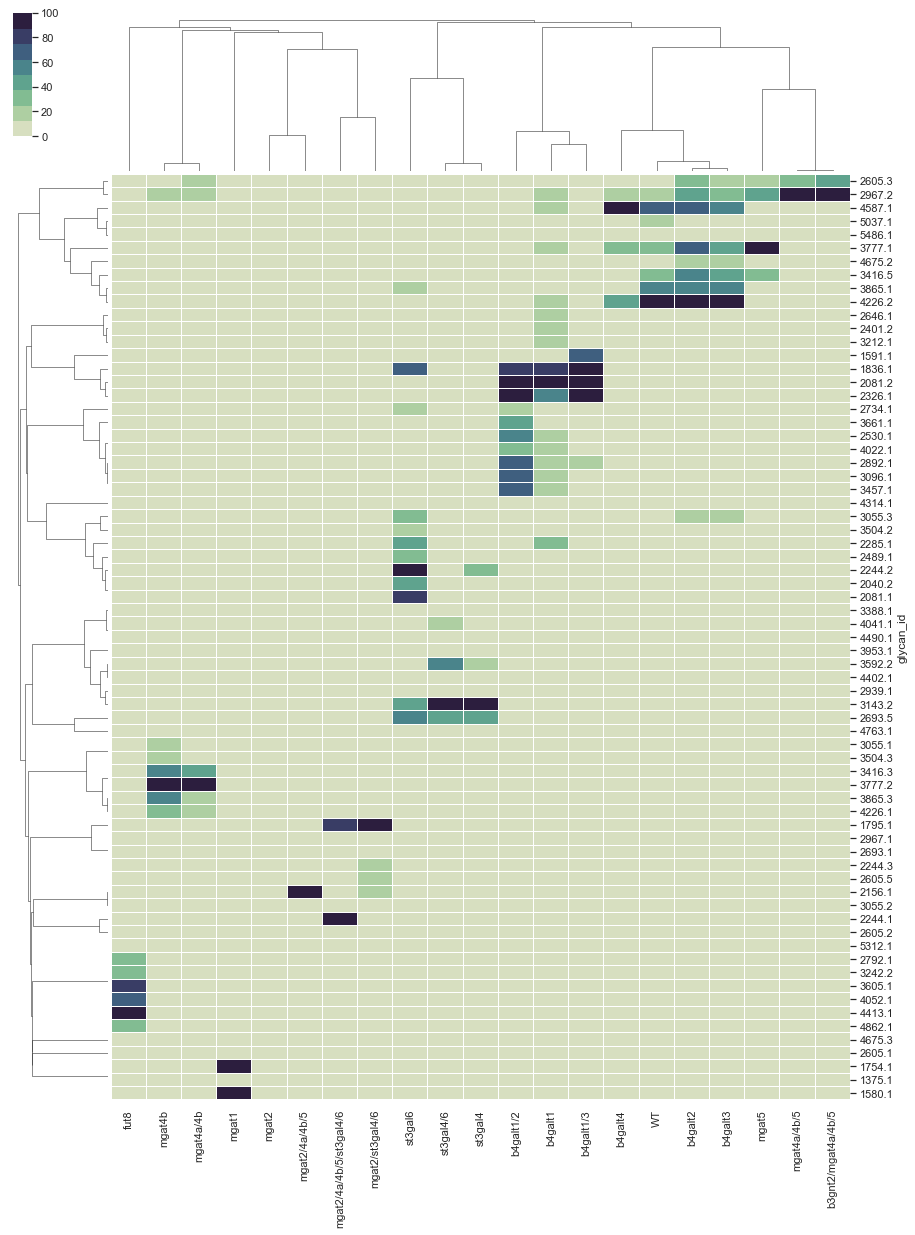

In [109]:
cluster_grid = clustering_analysis.draw_glycan_clustermap(motif_abd_table=abd_table,
                                                              address=keywords_dict[
                                                                          'plot_output_dir'] + 'pseudo_glycan_profile_clustering.eps',
                                                              metric="correlation",
                                                              cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
                                                              linewidths=0.01,
                                                              figsize=(15,20),
                                                              linecolor='white',
                                                              method='complete')

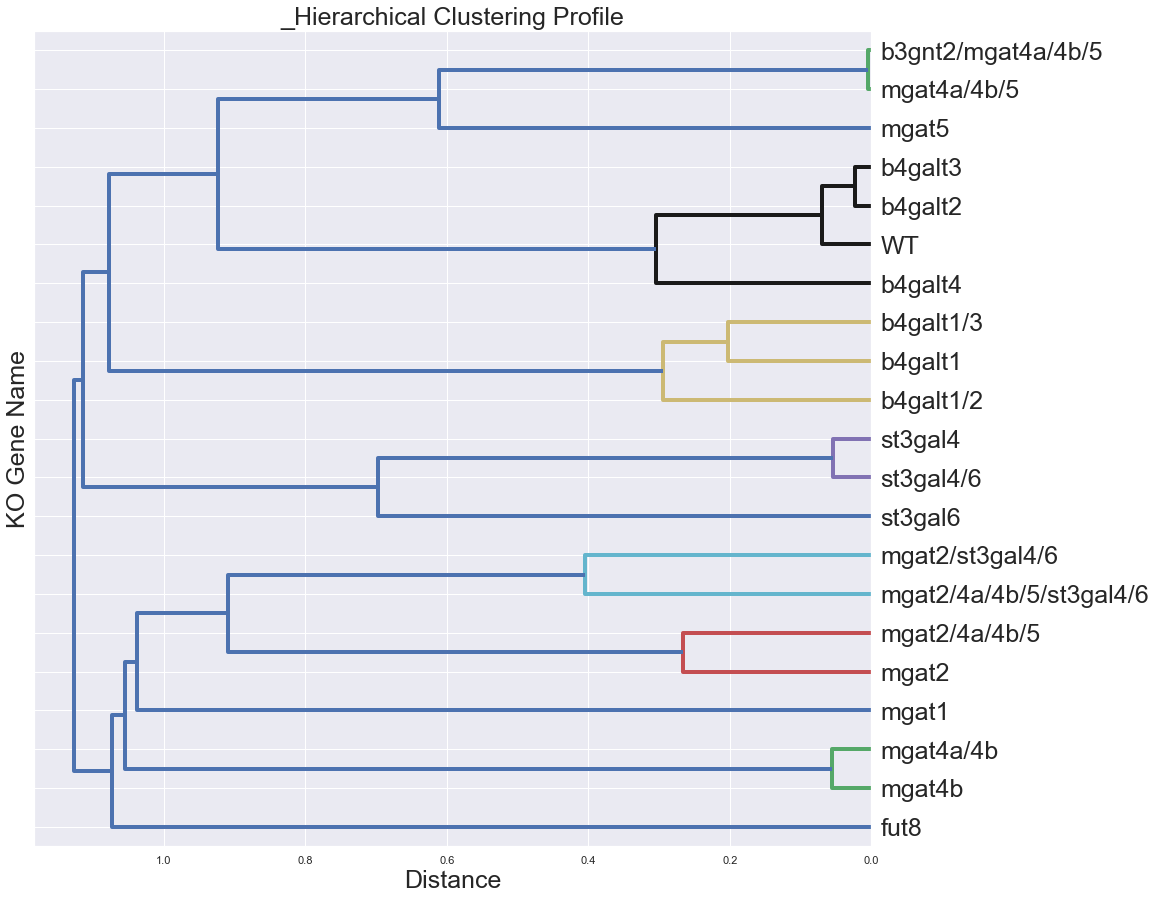

In [110]:
# reload(clustering_analysis)
glycoprofile_cluster_dict = clustering_analysis.draw_profile_cluster(g=cluster_grid,
                                                                     df=abd_table,
                                                                     profile_name=[],
                                                                     fig_size=(15,15),
                                                                     color_threshold=0.5,
                                                                     address=keywords_dict['plot_output_dir'] + 'pseudo_glycan_profile_clustering.eps')

In [97]:

"""generating the glycoprofile naming"""

glycan_substructure_occurance_dict_addr = keywords_dict['glycan_substructure_occurance_dict_addr']
# substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
glycoprofile_list_addr = keywords_dict['glycoprofile_list_addr']
glycan_identifier_to_structure_id = {}
naming = list(naming_abd_dict.keys())
for i in profile_columns:
    glycan_identifier_to_structure_id[i] = dict(zip(naming, naming))
match_dict = glycan_io.load_match_dict_from_json(glycan_substructure_occurance_dict_addr)
# print(naming_abd_dict)
profile_name = []

glycoprofile_list = process_glycoprofiles.get_glycoprofile_list(glycan_identifier_to_structure_id,
                                                                naming_abd_dict,
                                                                match_dict,
                                                                profile_columns,
                                                                profile_name,
                                                                glycoprofile_list_addr,
                                                                get_existance=True)
table_generator = process_glycoprofiles.substructureAbdTableGenerator(glycoprofile_list)
substructure_abd_table = table_generator.table_against_wt_relative_abd()
substructure_abd_table.to_csv(substructure_abd_table_addr)
substructure_abd_table

,WT,mgat4a/4b/5,mgat4b,mgat5,mgat1,mgat2/4a/4b/5/st3gal4/6,b4galt1/2,b4galt1,b4galt2,b4galt3,...,mgat2,fut8,b3gnt2/mgat4a/4b/5,mgat4a/4b,st3gal4/6,st3gal6,b4galt1/3,st3gal4,mgat2/st3gal4/6,mgat2/4a/4b/5
0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,0.977235,0.000000,0.972897,0.034019,0.233845,0.932050,0.948987,...,1.0000,1.000000,0.986382,1.000000,0.884895,0.500993,0.000000,0.928975,1.000000,1.000000
4,0.902557,0.000000,0.000000,0.660195,0.000000,0.000000,0.720604,0.516555,0.812216,0.863123,...,0.4566,0.595215,0.000000,0.000000,0.947189,0.631979,0.301787,0.875294,0.263512,0.000000
5,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.0000,1.000000,1.000000,1.000000,1.000000,0.988601,0.834833,1.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.948263,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.000000,1.000000,1.000000,0.977235,0.000000,0.972897,0.034019,0.233845,0.932050,0.948987,...,1.0000,0.000000,0.986382,1.000000,0.884895,0.500993,0.000000,0.928975,1.000000,1.000000
9,0.902557,0.000000,0.000000,0.660195,0.000000,0.000000,0.720604,0.516555,0.812216,0.863123,...,0.4566,0.000000,0.000000,0.000000,0.947189,0.631979,0.301787,0.875294,0.263512,0.000000


In [137]:
substructure_abd_table.transpose().to_csv(substructure_abd_table_addr)

In [98]:
# # substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

# # substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
# # core = select_motifs.nglycan_core
# _substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
#                                                     glycan_core=core,
#                                                     linkage_specific=linkage_specific)  # unicarbkb_substructures_12259.json
# _substructure_lab.get_dependence_tree_core()

In [99]:
# json_utility.store_json(keywords_dict['output_data_dir']+'substructure_dep_tree_core.json',_substructure_lab.substructure_dep_tree_core)


In [100]:
# for i in _substructure_lab.substructure_dict[4]:
#     plot_glycan_utilities.plot_glycan(_substructure_lab.substructure_vec[i], label=True, title=i)

In [111]:
rule_table = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/substructure_dep_tree_core_with_enzyme.csv', index_col=0)
set(rule_table['enzyme'])

{'A3SIAT',
 'A6FUCT',
 'A6SIAT',
 'B4GALT',
 'GNTII',
 'GNTIV',
 'GNTV',
 'IGNT',
 'MANII'}

In [102]:
import pandas as pd
rule_table = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/substructure_dep_tree_core_with_enzyme.csv', index_col=0)
edge_list = list(zip(rule_table.index_source,rule_table.index_target))
dependence_tree= {}
for i in range(len(_substructure_vec)):
    dependence_tree[i]=[]
for i in edge_list:
    s,t = i
    dependence_tree[s].append(t)
nodes_stat = select_motifs.NodesState(dependence_tree, select_motifs.get_weight_dict(substructure_abd_table), linkage_specific=True)

# plot_glycan_utilities.plot_glycan_list([_substructure_vec[i] for i in [186, 187, 311, 312, 313, 314, 466, 467, 468, 638]])

Start dropping nodes with weight zero, nodes count: 1407
Nodes left [7, 20, 21, 22, 23, 24, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 96, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 181, 182, 183, 184, 186, 187, 191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 292, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 433, 434, 435, 436, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487

In [119]:
_modified_edge_list = []
enzyme_list = []
start_node = []
end_node = []
for i in nodes_stat.dep_tree:
    for j in nodes_stat.dep_tree[i]:
        start_node.append(i)
        end_node.append(j)
        enzyme_list.append(rule_table[(rule_table.index_source==i) & (rule_table.index_target==j)].index[0])

In [121]:
modified_table = rule_table[rule_table.index.isin(enzyme_list)]

In [122]:
modified_table

,enzyme,index_source,index_target
0,B4GALT,0,3
1,GNTII,0,5
2,A6FUCT,0,2
3,GNTIV,0,4
4,GNTII,2,10
5,GNTIV,2,9
6,GNTV,2,8
7,B4GALT,3,17
9,B4GALT,3,18
10,A6FUCT,4,11


In [124]:
substructure_abd_table[substructure_abd_table.index.isin(set(end_node+start_node))]

,WT,mgat4a/4b/5,mgat4b,mgat5,mgat1,mgat2/4a/4b/5/st3gal4/6,b4galt1/2,b4galt1,b4galt2,b4galt3,...,mgat2,fut8,b3gnt2/mgat4a/4b/5,mgat4a/4b,st3gal4/6,st3gal6,b4galt1/3,st3gal4,mgat2/st3gal4/6,mgat2/4a/4b/5
0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,0.977235,0.000000,0.972897,0.034019,0.233845,0.932050,0.948987,...,1.0000,1.000000,0.986382,1.000000,0.884895,0.500993,0.000000,0.928975,1.000000,1.000000
4,0.902557,0.000000,0.000000,0.660195,0.000000,0.000000,0.720604,0.516555,0.812216,0.863123,...,0.4566,0.595215,0.000000,0.000000,0.947189,0.631979,0.301787,0.875294,0.263512,0.000000
5,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.0000,1.000000,1.000000,1.000000,1.000000,0.988601,0.834833,1.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.948263,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.000000,1.000000,1.000000,0.977235,0.000000,0.972897,0.034019,0.233845,0.932050,0.948987,...,1.0000,0.000000,0.986382,1.000000,0.884895,0.500993,0.000000,0.928975,1.000000,1.000000
9,0.902557,0.000000,0.000000,0.660195,0.000000,0.000000,0.720604,0.516555,0.812216,0.863123,...,0.4566,0.000000,0.000000,0.000000,0.947189,0.631979,0.301787,0.875294,0.263512,0.000000
10,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,1.000000,1.000000,1.000000,0.988601,0.834833,1.000000,0.000000,0.000000


Start dropping nodes with weight zero, nodes count: 815
Nodes left [7, 20, 21, 22, 23, 24, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 96, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 181, 182, 183, 184, 186, 187, 191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 292, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 433, 434, 435, 436, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487,

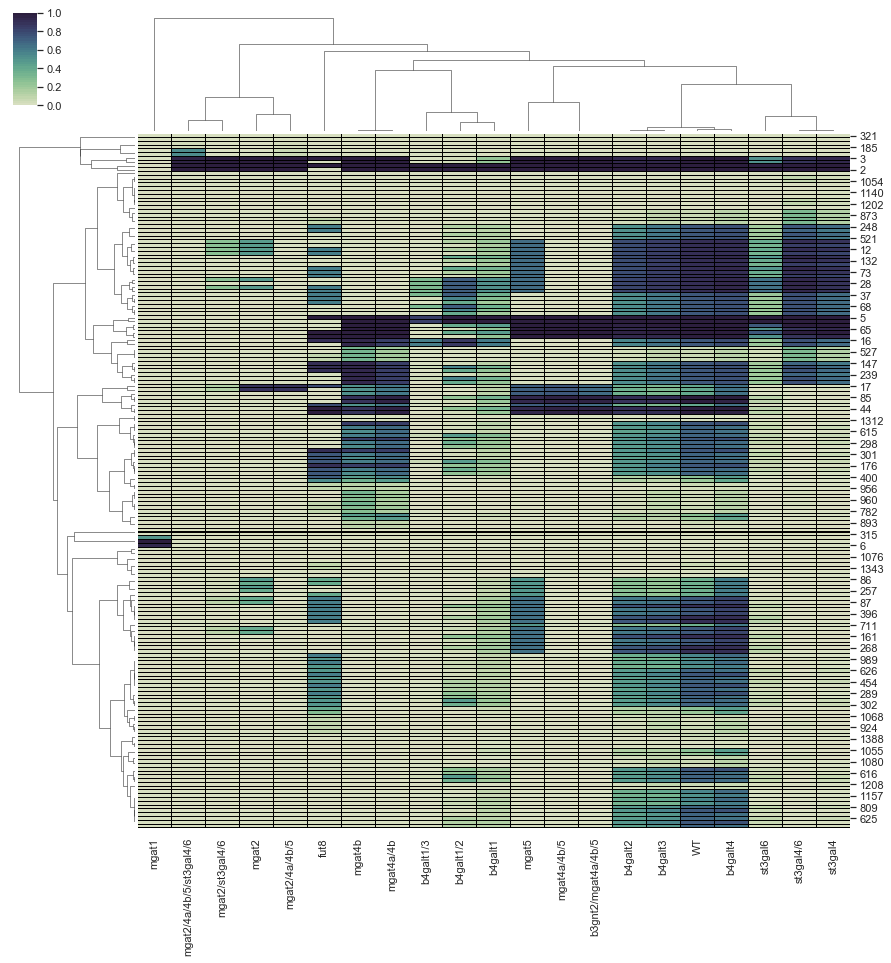

In [138]:
# reload(select_motifs)
a_node_state = select_motifs.NodesState(dependence_tree, select_motifs.get_weight_dict(substructure_abd_table), linkage_specific=True)
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(
    drop_parellel=False, drop_diff_abund=False)
# print('_substructure_lab.core_index',_substructure_lab.core_index)
# if _substructure_lab.core_index in mod_nodes:
#         mod_nodes.remove(_substructure_lab.core_index)
#         print("Removed core, the index is", _substructure_lab.core_index)
motif_dict = {}
for i in mod_nodes:
    motif_dict[i] = _substructure_vec[i]
glycan_io.output_glycan_dict_to_glycoct_dict(motif_dict, keywords_dict['motif_glycoct_dict_addr'])

motif_abd_table = substructure_abd_table[substructure_abd_table.index.isin(mod_nodes)]
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.transpose().to_csv(motif_abd_table_addr)
motif_abd_table
# for i in mod_nodes:
#     plot_glycan_utilities.plot_glycan(_substructure_lab.substructure_vec[i], 
#                                       title=i, 
#                                       label=True,
#                                       addr=keywords_dict['plot_output_dir'] + 'motif_'+str(i)+'.eps')

#     plt.savefig()
#     print(keywords_dict['plot_output_dir'] + 'motif_'+str(i)+'.eps')
# keywords_dict['abundance_table.csv'] = 
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
#                                            motif_abd_table=motif_abd_table, )
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
#                                            motif_abd_table=motif_abd_table, 
#                                            select_profile_name = selected_name_list)
selected_name_list = motif_abd_table.columns.tolist()

    # df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
    # motif_abd_table.to_csv(os.path.join(keywords_dict['intermediate_dir'],
    #                                     str(len(selected_name_list)) + r"selected_abundance_matrix.txt"))
    # motif_abd_table.colmuns = selected_name_list

    # plt.savefig(keywords_dict['plot_output_dir'] + 'pseudo_profile_clustering.svg')
# motif_abd_table.drop()
cluster_grid = clustering_analysis.draw_glycan_clustermap(motif_abd_table=motif_abd_table,
                                                              address=keywords_dict[
                                                                          'plot_output_dir'] + 'pseudo_profile_clustering.eps',
                                                              metric="correlation",
                                                              cmap=sns.cubehelix_palette(40, start=.5, rot=-.75),
                                                              linewidths=0.01,
                                                              figsize=(15,15),
                                                              linecolor='black',
                                                              method='complete')

In [19]:
# reload(ndex)

a_node_state.upload_network(edge_list, list(range(len(_substructure_vec))))

(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a6a56ce48>)

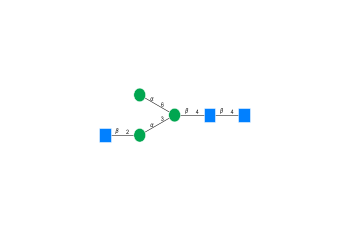

In [50]:
from  glypy.plot.draw_tree import plot
plot(_substructure_vec[0], label=True, title=str(i))

0 [3, 5, 2, 4]
1 []
2 [10, 9, 8]
3 [17, 7, 18]
4 [11, 12, 14, 9]
5 [15, 10, 13, 16, 14]
6 [19, 1]
7 []
8 [45, 20, 40]
9 [28, 26, 25]


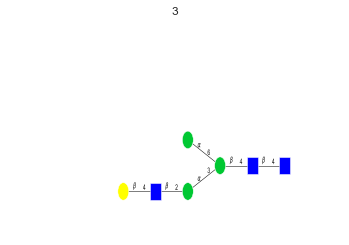

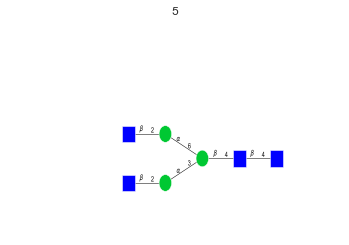

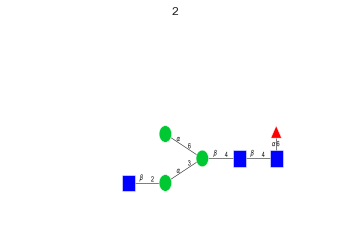

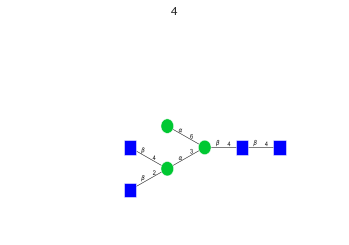

In [31]:
for i in [3, 5, 2, 4]:
    plot_glycan_utilities.plot_glycan(_substructure_vec[i],label=True, title=str(i))
    
for i in range(10):
    print(i,dependence_tree[i])

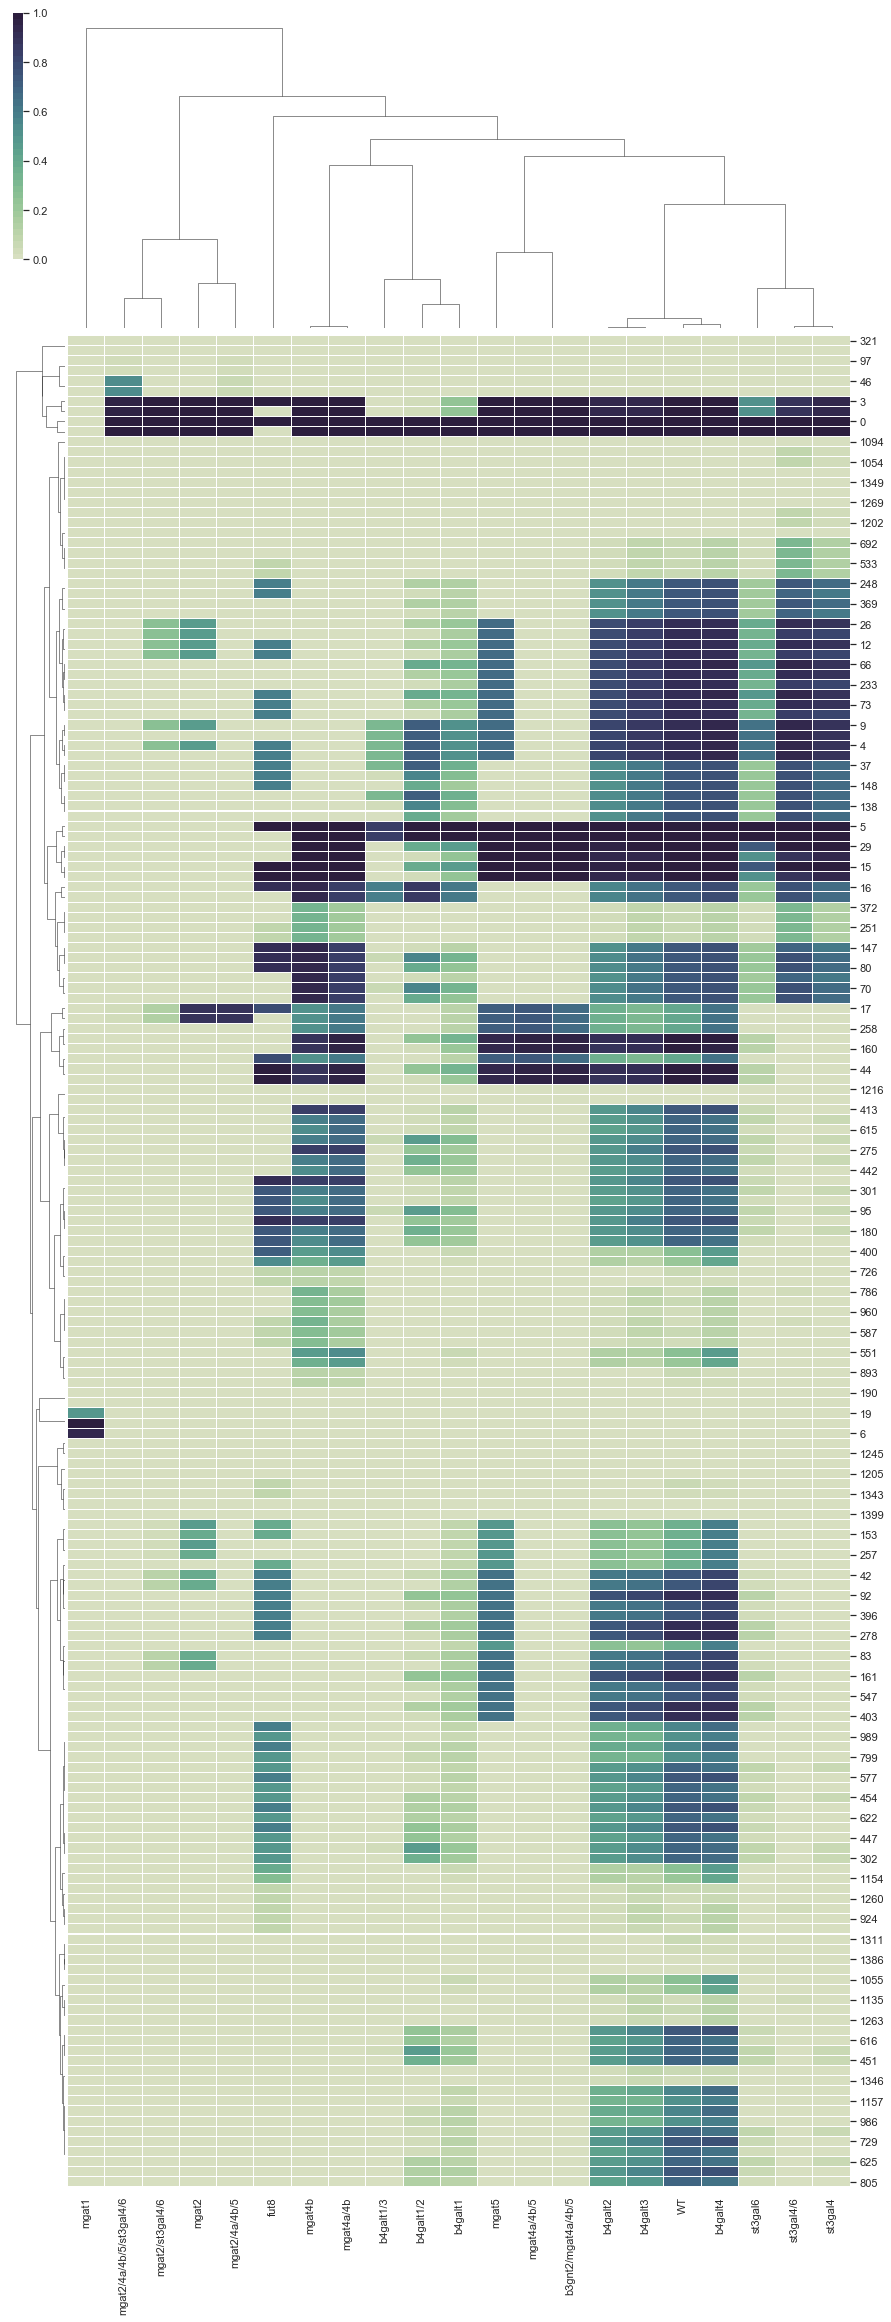

In [133]:
motif_abd_table=motif_abd_table
address=keywords_dict[
          'plot_output_dir'] + 'pseudo_profile_clustering.eps',
metric="correlation"
cmap=sns.cubehelix_palette(40, start=.5, rot=-.75)
linewidths=0.01
figsize=(15,40)
linecolor='white'
method='complete'


    # draw clustermap
g = sns.clustermap(motif_abd_table,
                       metric=metric,
                       cmap=cmap,
                       linewidths=linewidths,
                       figsize=figsize,
                       linecolor=linecolor,
                       method=method,
                  col_cluster=True)

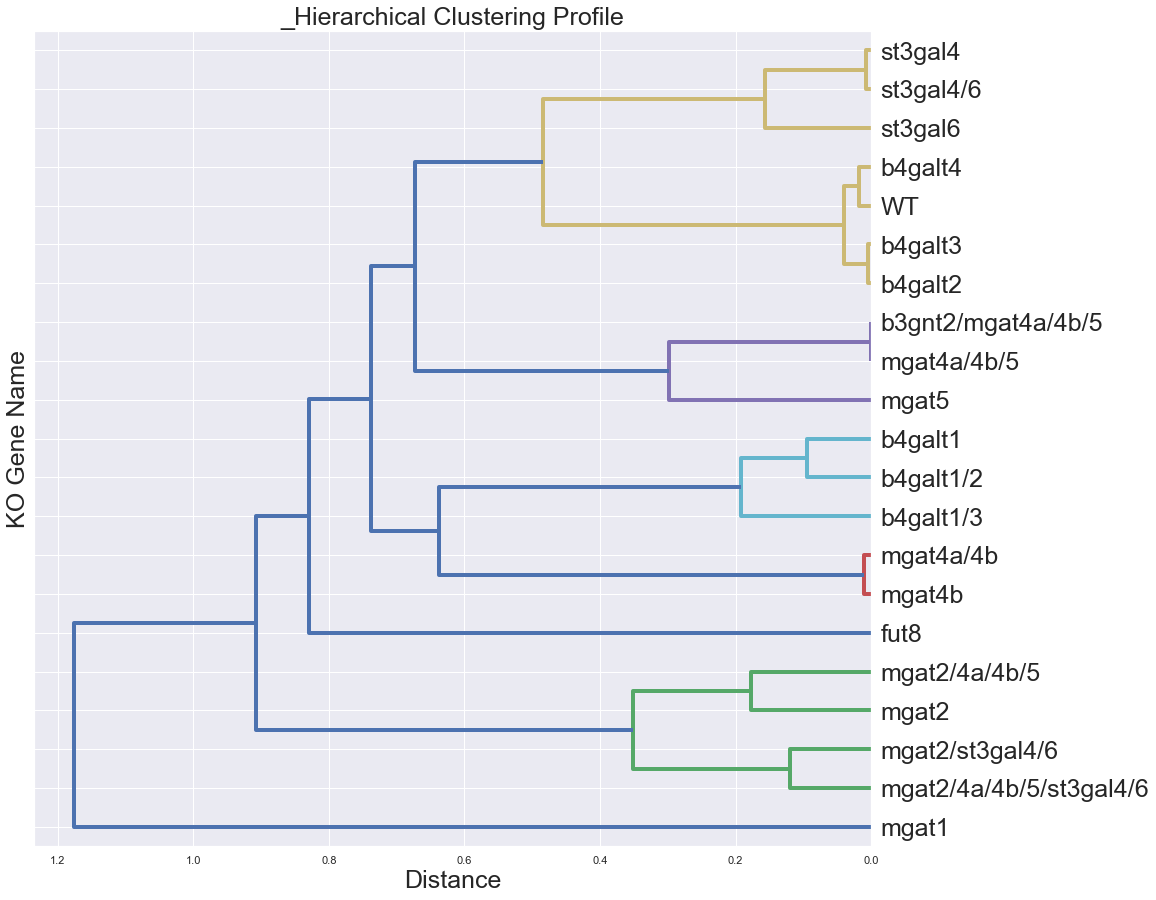

In [134]:
# reload(clustering_analysis)
glycoprofile_cluster_dict = clustering_analysis.draw_profile_cluster(g=cluster_grid,
                                                                     df=motif_abd_table,
                                                                     profile_name=[],
                                                                     fig_size=(15,15),
                                                                     color_threshold=0.5,
                                                                     address=keywords_dict['plot_output_dir'] + 'profile_clustering.svg')


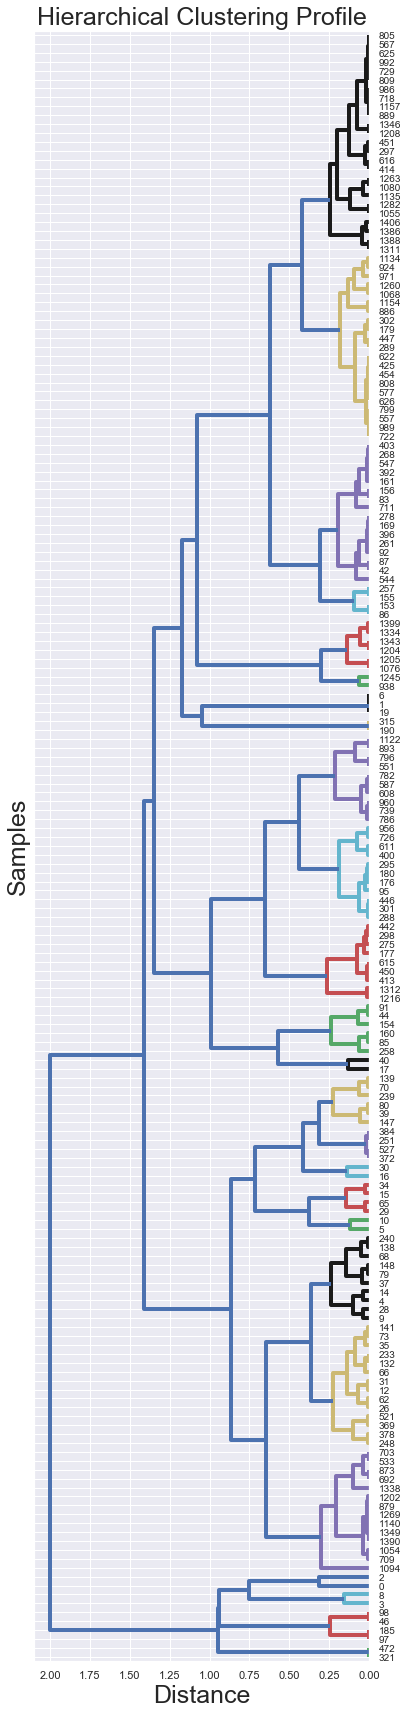

In [141]:
glyco_motif_cluster_dict = clustering_analysis.draw_motif_cluster(g=cluster_grid,
                                                                  df=motif_abd_table,
                                                                  color_threshold=0.30,
                                                                  address=keywords_dict[
                                                                              'plot_output_dir'] + 'motif_cluster.eps',
                                                                  fig_size=(6, 30),
                                                                  )


[321, 472]
[46, 97, 98, 185]
[3, 8]
[0]
[2]
[533, 692, 703, 709, 873, 879, 1054, 1094, 1140, 1202, 1269, 1338, 1349, 1390]
[12, 26, 31, 35, 62, 66, 73, 132, 141, 233, 248, 369, 378, 521]
[4, 9, 14, 28, 37, 68, 79, 138, 148, 240]
[5, 10]
[15, 29, 34, 65]
[16, 30]
[251, 372, 384, 527]
[39, 70, 80, 139, 147, 239]
[17, 40]
[44, 85, 91, 154, 160, 258]
[177, 275, 298, 413, 442, 450, 615, 1216, 1312]
[95, 176, 180, 288, 295, 301, 400, 446, 611, 726, 956]
[551, 587, 608, 739, 782, 786, 796, 893, 960, 1122]
[190, 315]
[1, 6, 19]
[938, 1245]
[1076, 1204, 1205, 1334, 1343, 1399]
[86, 153, 155, 257]
[42, 83, 87, 92, 156, 161, 169, 261, 268, 278, 392, 396, 403, 544, 547, 711]
[179, 289, 302, 425, 447, 454, 557, 577, 622, 626, 722, 799, 808, 886, 924, 971, 989, 1068, 1134, 1154, 1260]
[297, 414, 451, 567, 616, 625, 718, 729, 805, 809, 889, 986, 992, 1055, 1080, 1135, 1157, 1208, 1263, 1282, 1311, 1346, 1386, 1388, 1406]


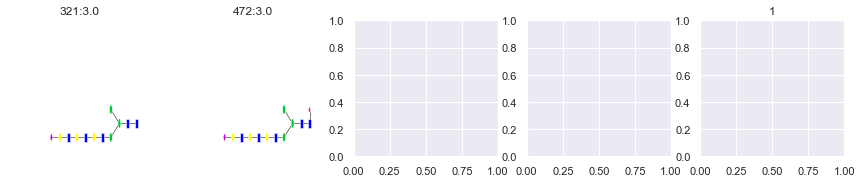

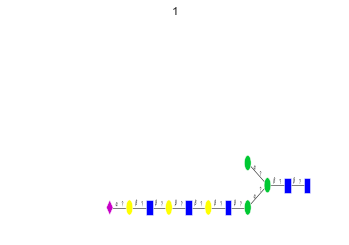

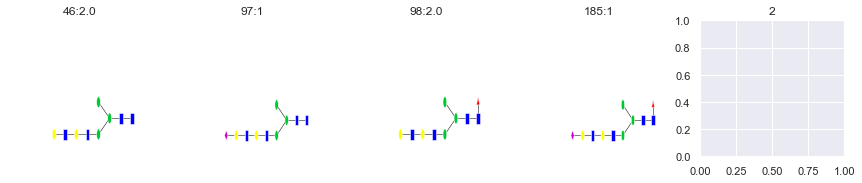

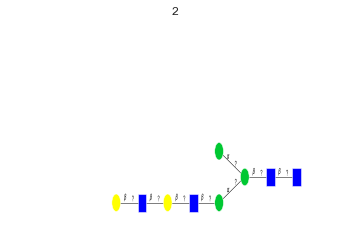

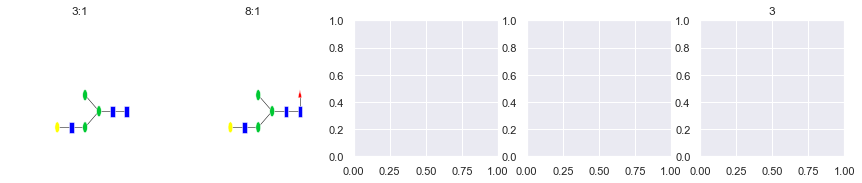

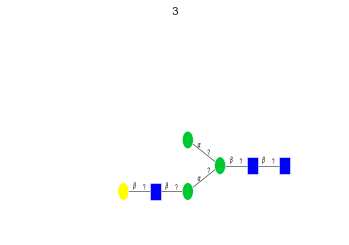

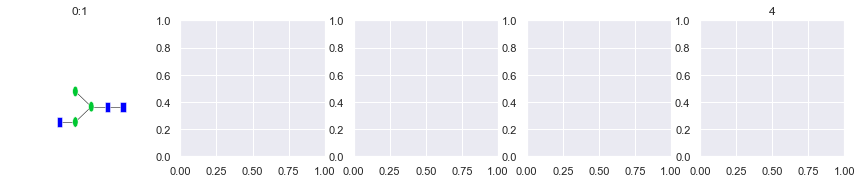

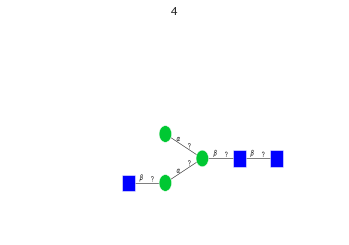

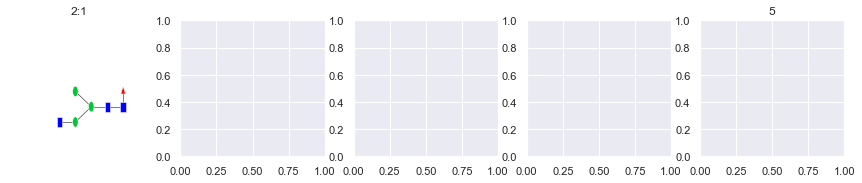

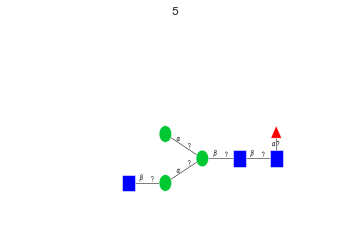

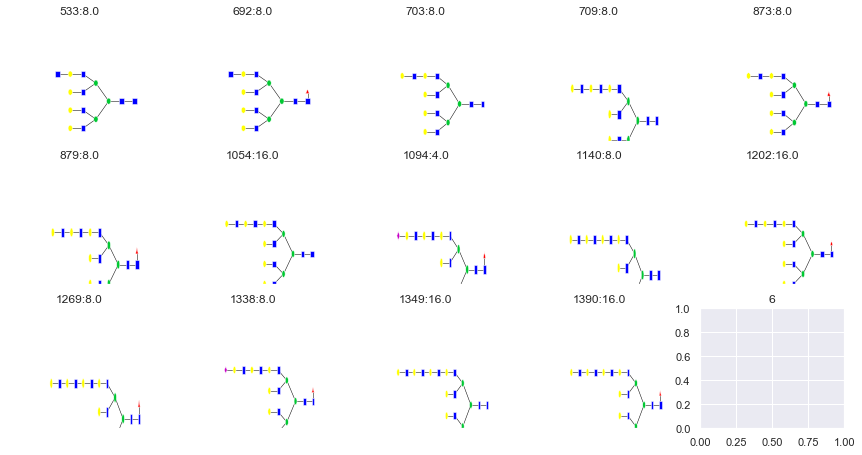

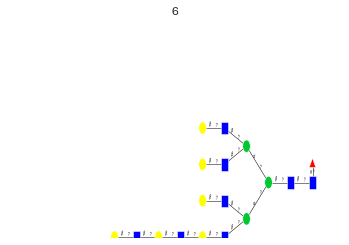

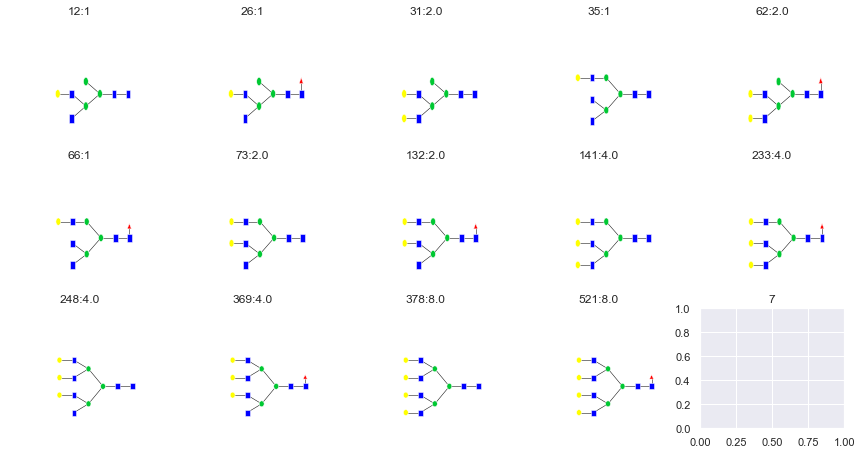

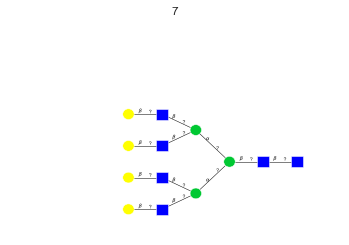

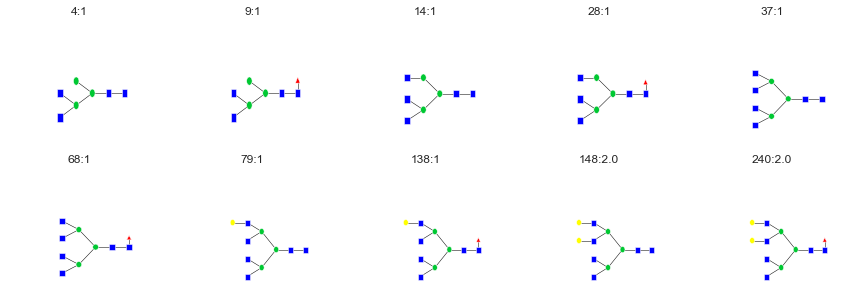

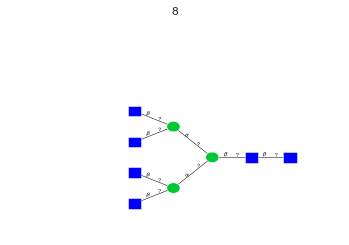

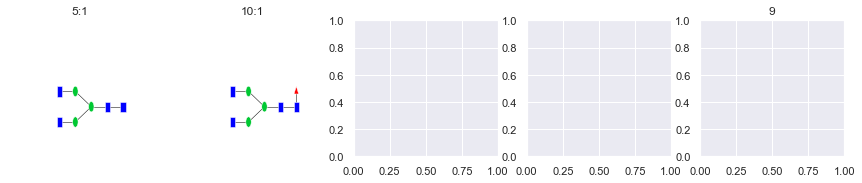

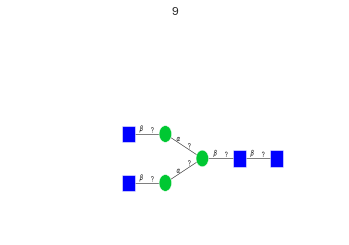

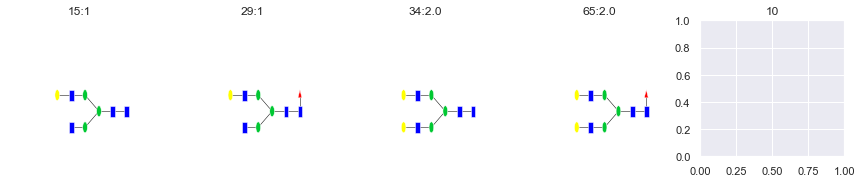

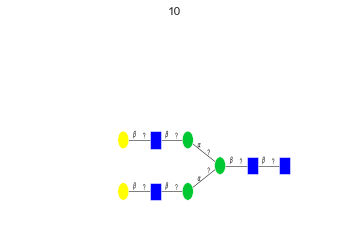

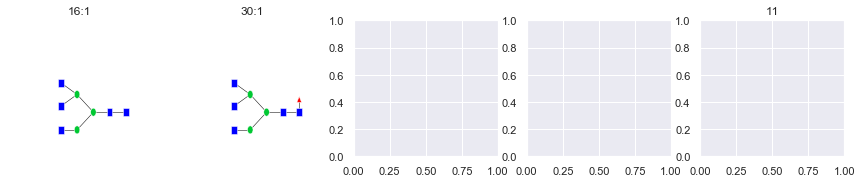

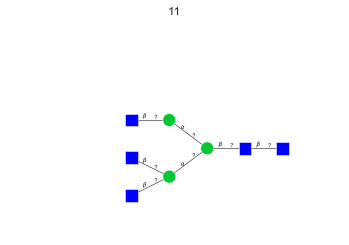

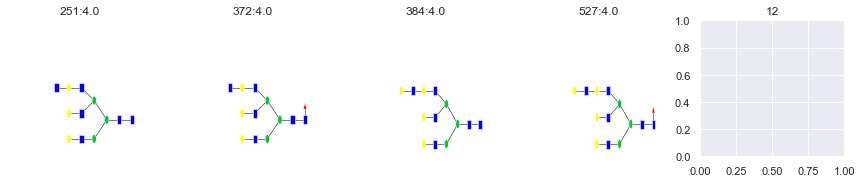

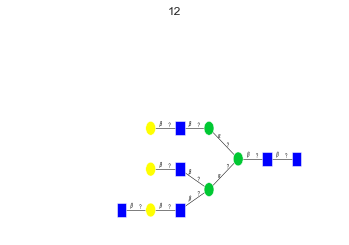

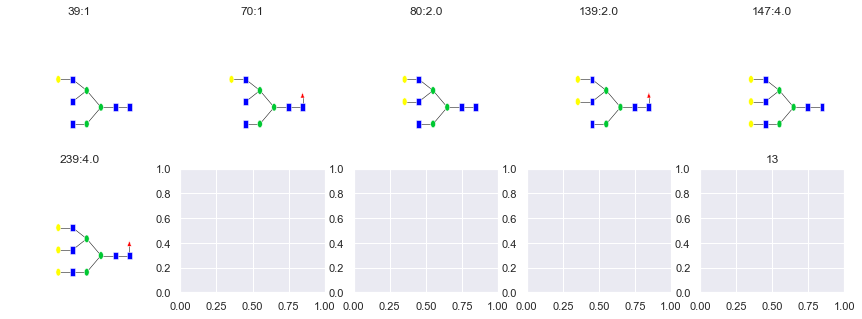

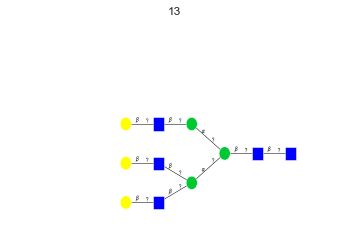

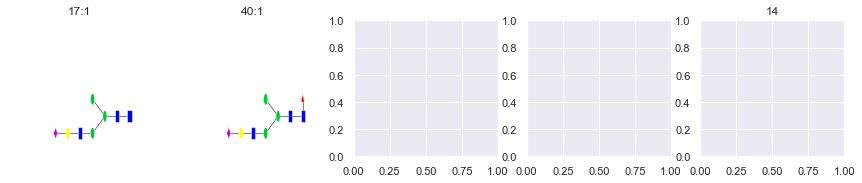

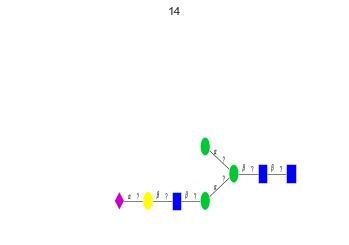

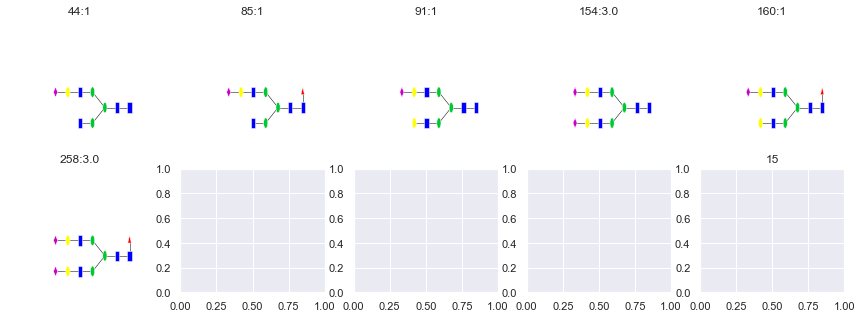

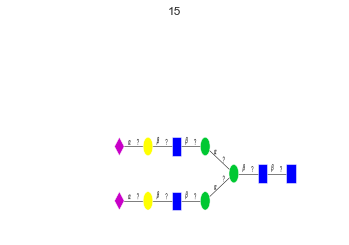

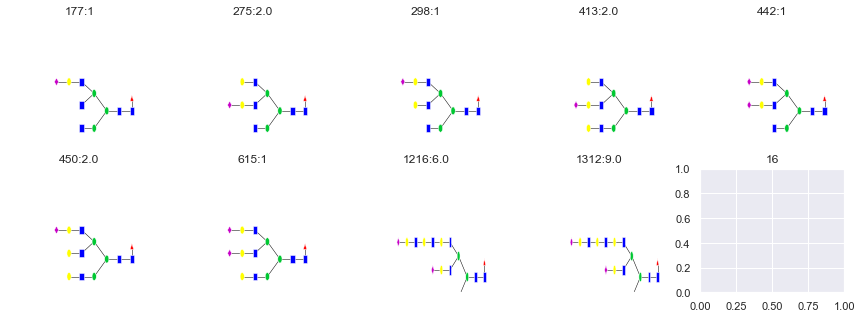

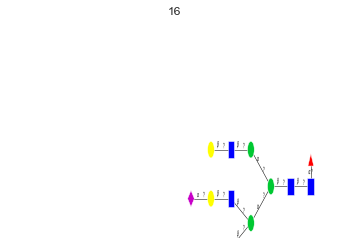

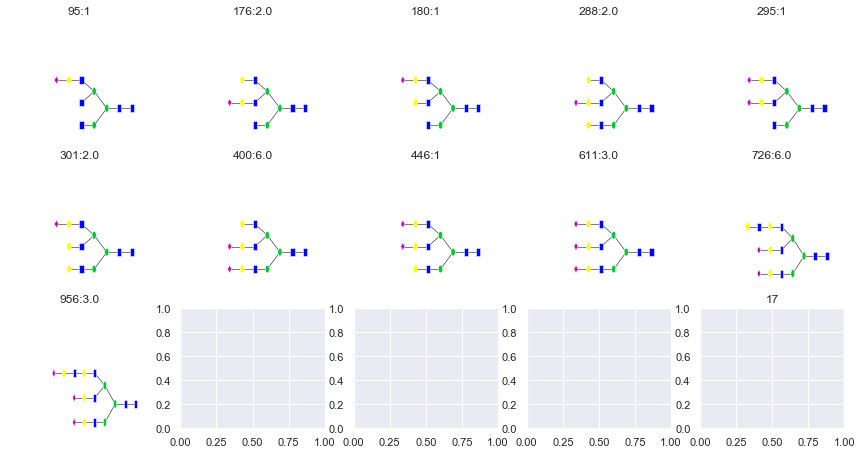

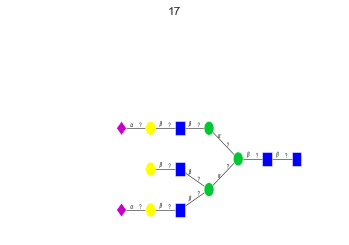

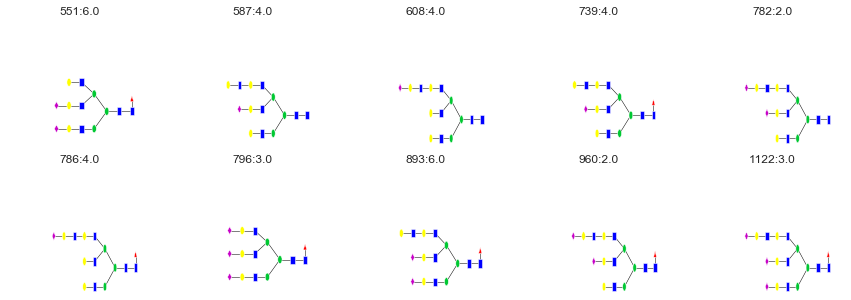

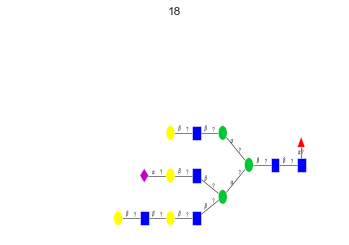

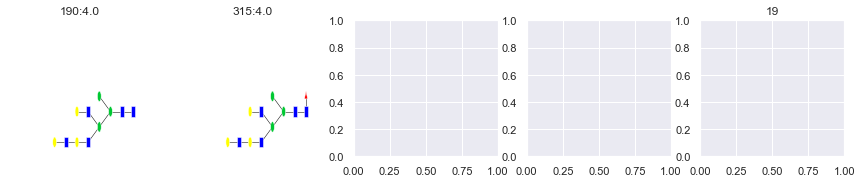

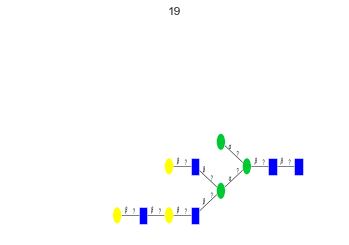

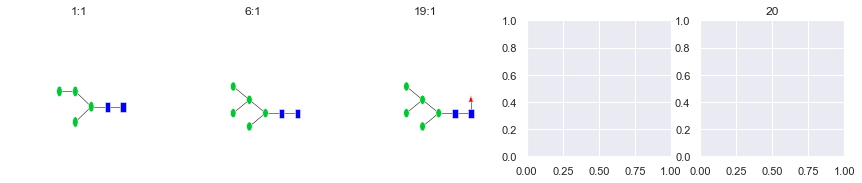

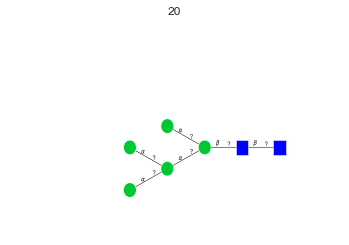

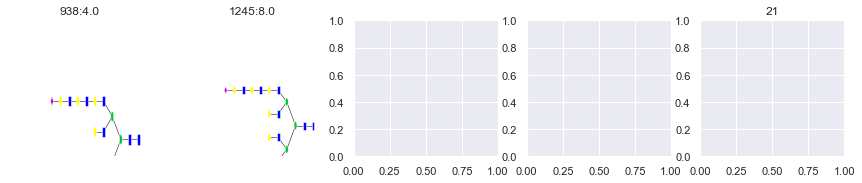

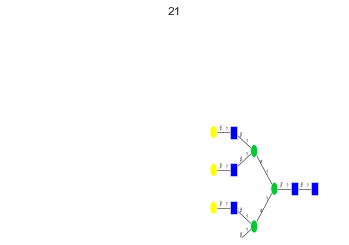

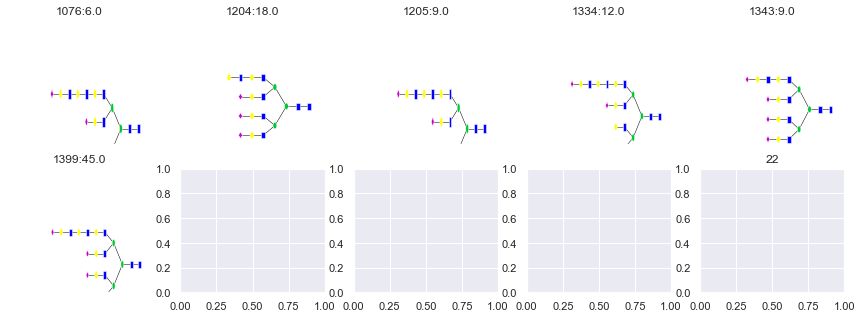

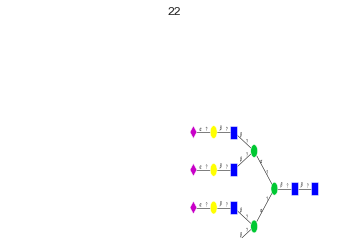

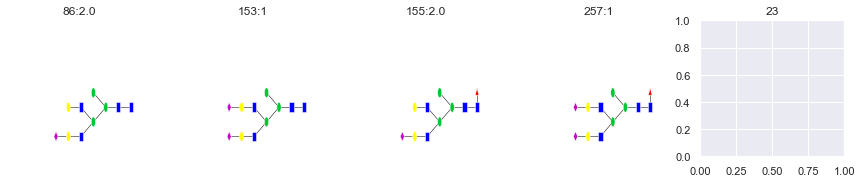

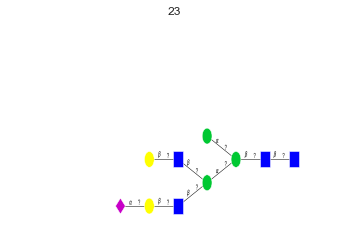

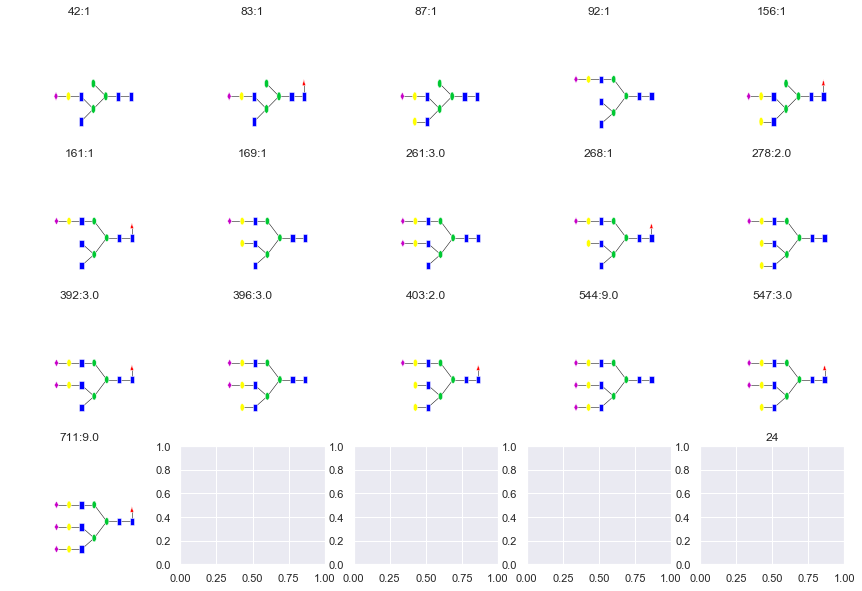

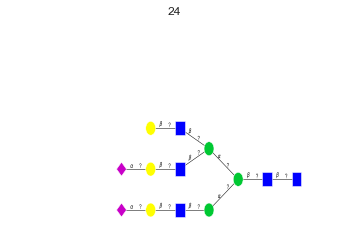

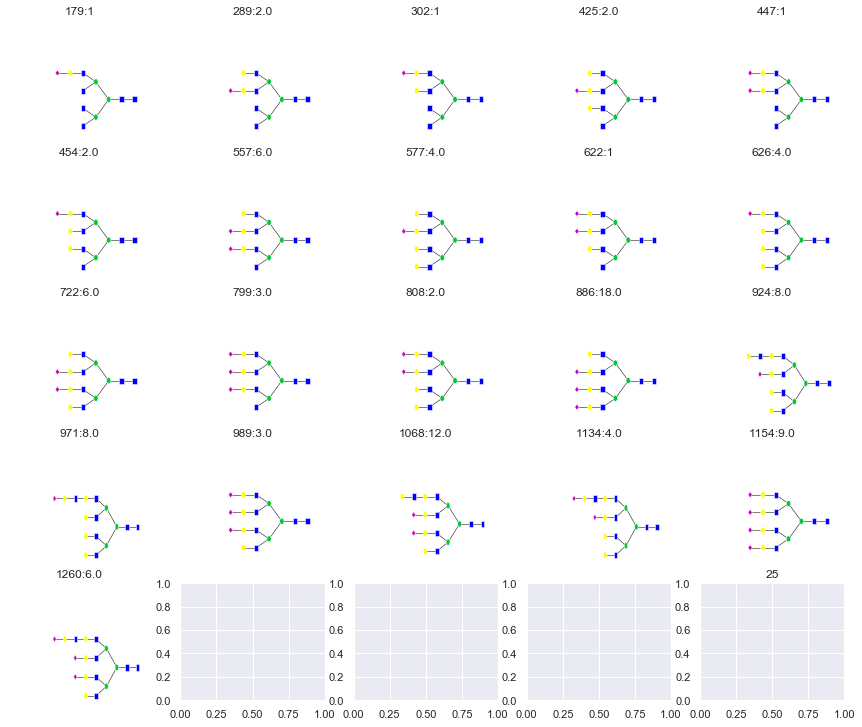

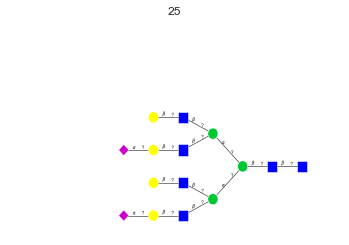

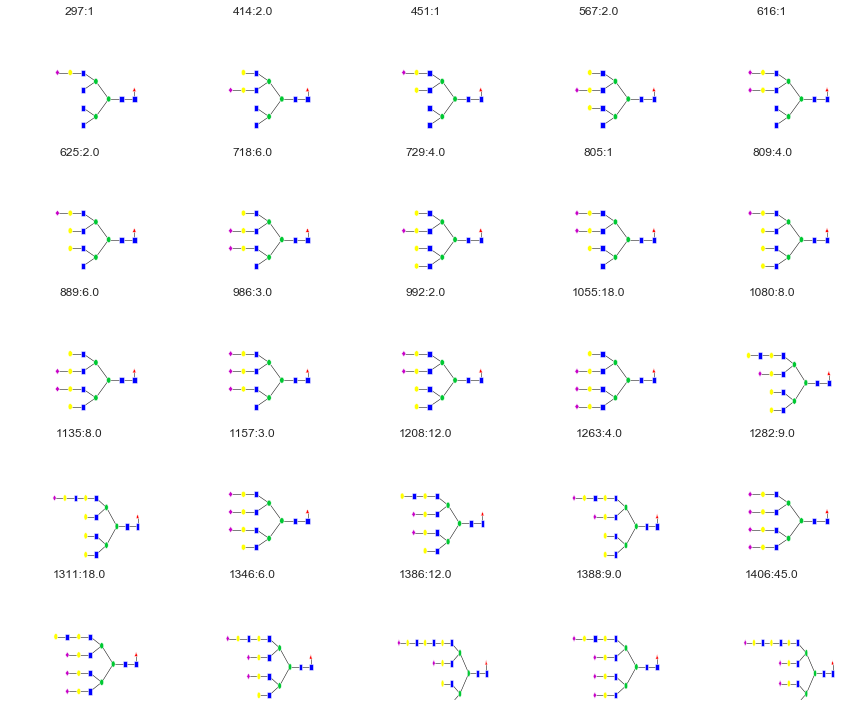

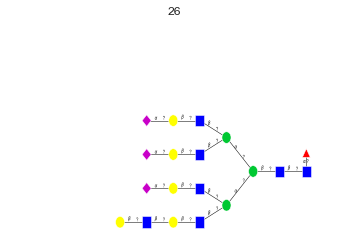

In [142]:

# reload(clustering_analysis)
# reload(pipeline_functions)
rep_list = pipeline_functions.draw_substructure_representative_pip(glyco_motif_cluster=glyco_motif_cluster_dict,
                                                        substructure_vec=_substructure_vec,
                                                        motif_weights_dict=merged_weights_dict,
                                                        plot_all_substructure=True,
                                                        address_dir=keywords_dict['plot_output_dir'],
                                                        threshold=0.51,
                                                        plot_rep=True)

In [ ]:
plot_glycan_utilities.plot_glycan(_substructure_vec[469], label=True)
plot_glycan_utilities.plot_glycan(_substructure_vec[639], label=True)

In [ ]:
_substructure_vec[469]